In [9]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
mcpp_geo = pd.read_csv('data/MCPPs_WebMerc_6549033815379107200.csv')

In [3]:
mcpp_geo

,objectid,neighborhood,precinct,Shape__Area,Shape__Length
0,1,ALASKA JUNCTION,SW,3.794746e+07,32874.723464
1,2,ALKI,SW,5.775714e+07,55869.551553
2,3,BALLARD NORTH,N,1.249340e+08,49759.671922
3,4,DOWNTOWN COMMERCIAL,W,1.732340e+07,20647.668896
4,5,BALLARD SOUTH,N,5.886391e+07,38678.590711


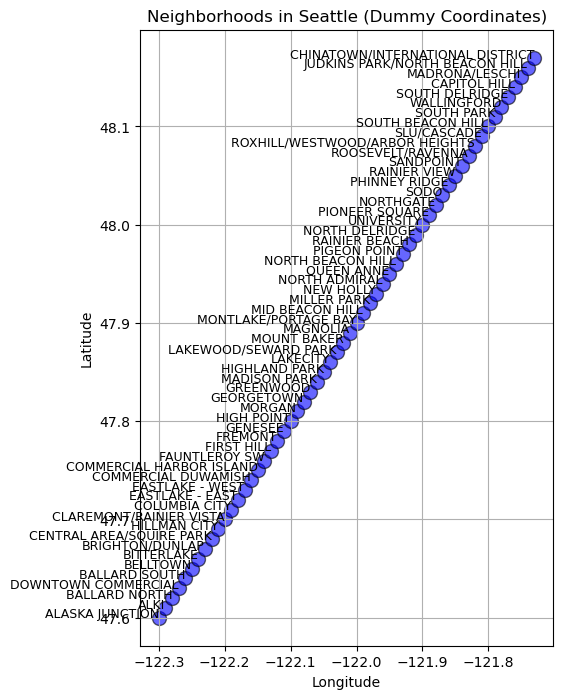

In [10]:
# Generate dummy coordinates
mcpp_geo['latitude'] = [47.6 + i * 0.01 for i in range(len(mcpp_geo))]
mcpp_geo['longitude'] = [-122.3 + i * 0.01 for i in range(len(mcpp_geo))]

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(mcpp_geo, geometry=gpd.points_from_xy(mcpp_geo.longitude, mcpp_geo.latitude))

# Define the map projection (using EPSG:4326 for WGS 84)
gdf.set_crs(epsg=4326, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the neighborhoods
gdf.plot(ax=ax, color='blue', markersize=100, alpha=0.6, edgecolor='k')

# Adding labels
for idx, row in gdf.iterrows():
    ax.text(row.geometry.x, row.geometry.y, row['neighborhood'], fontsize=9, ha='right')

# Set map details
ax.set_title('Neighborhoods in Seattle (Dummy Coordinates)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True)

plt.show()